[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task3_dmrf_OOP.ipynb)

# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.



In [1]:
import requests
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import sqlite3 as sl

In [2]:
class DomIdLoader:
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 100
        #self.i=i
        self.url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
        self.objects_data = None
        self.unik=[]
    def get_ids(self):
        for i in tqdm(range (1,10700,100)):
            self.offset_ = i
            paramz = {
                'offset': self.offset_,
                'limit': self.limit_,
                'sortField':'devId.devShortCleanNm',
                'sortType':'asc',
                'objStatus':'0',
            }
            res = requests.get(self.url, params=paramz)

            self.objects_data = res.json()
            objects_list = self.objects_data.get('data').get('list')
            objids = [x.get('objId') for x in objects_list]
            self.unik.extend(objids)
        #return self.unik
    def show_ids(self):
        result=self.unik
        return result
               


In [3]:
#создаем объект
a=DomIdLoader()

In [4]:
#грузим
a.get_ids()

In [41]:
a.show_ids()[0:2]

[13383,
 13397,
 13391,
 13398,
 13399,
 36912,
 44076,
 27476,
 10891,
 39175,
 39176,
 39174,
 27049,
 41420,
 41421,
 30292,
 19457,
 18709,
 18708,
 21534,
 21536,
 21535,
 21537,
 41625,
 42192,
 27542,
 20524,
 24093,
 27801,
 27798,
 27808,
 27806,
 23862,
 23864,
 23863,
 27802,
 27803,
 45249,
 21720,
 33899,
 17707,
 17712,
 33745,
 47610,
 44489,
 44621,
 46571,
 15888,
 15885,
 15886,
 15890,
 15889,
 15891,
 35324,
 41612,
 45256,
 41613,
 41614,
 41615,
 41616,
 24820,
 41618,
 41621,
 41619,
 24819,
 41617,
 24818,
 41620,
 24817,
 45772,
 18136,
 44752,
 37465,
 33525,
 3148,
 33095,
 33096,
 33097,
 33098,
 33099,
 33100,
 33107,
 33180,
 33101,
 33172,
 33185,
 33115,
 33135,
 33136,
 33137,
 33143,
 33148,
 33150,
 33151,
 33152,
 33153,
 33154,
 33155,
 33156,
 33157,
 33158,
 33159,
 33160,
 33161,
 33162,
 33163,
 33164,
 33165,
 33190,
 33166,
 33167,
 33194,
 33195,
 33196,
 33197,
 33169,
 33170,
 33201,
 33202,
 33174,
 33207,
 33208,
 33209,
 33210,
 33179,
 

In [42]:
class ObjectInfoExtractor:
    def __init__(self, ids):
        self.ids=ids
        self.url2='https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/'
        self.dfs = pd.DataFrame()
    def load_data(self):
        for ids in tqdm(a.show_ids()):
            res = requests.get(self.url2 + str(ids))
            self.dfs=self.dfs.append(pd.json_normalize(res.json().get('data')))

    def df_converter(self):
        result2=self.dfs
        return result2

In [43]:
b=ObjectInfoExtractor(a.show_ids())

In [44]:
b.load_data()

In [45]:
b.df_converter()

,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,13383,28105,72,г Тюмень,4.0,20,68,2022-12-31,Другое,По желанию заказчика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6.0,12,65,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,13391,28101,72,"г Тюмень, ул Профсоюзная",3.0,12,44,2022-12-31,Другое,По желанию заказчика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,13398,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7.0,10,43,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,13399,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1.0,1,0,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,28073,96446,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",26.0,26,312,2024-06-30,Другое,Под ключ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,28072,96379,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",2.0,26,312,2024-06-30,Другое,Под ключ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,28070,99487,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",2.0,26,768,2024-06-30,Другое,Под ключ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,44447,475093,76,"г Ярославль, Фрунзенский район, территория в р...",6.0,6,127,2022-12-31,Кирпич,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
class Saver:
    def __init__(self, data):
        self.data=data
        

    def save_csv(self):
        self.data.to_csv('stop_loc.csv')#записываем в иксель


    def save_xl(self):
        self.data.to_excel('stop_loc.xlsx')#записываем в иксель

    def save_sql(self):
        
        con = sl.connect('my-test.db')
        dfs3 = self.data.applymap(str)
        dfs3.to_sql('dfs4', con)



In [64]:
c=Saver(b.df_converter())

In [49]:
c.save_csv()

In [52]:
c.save_xl()

In [65]:
c.save_sql()

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [86]:
class Visualizer:
    def __init__(self,data):
        self.data=data

    def make_boxplot(self, ):
        plt.title("Сравнение цен на недвижимость Тюменской и Свердловской области", fontsize =20)
        xlabel('xlabel')
        ylabel('ylabel')
        sns.boxplot(x="developer.regRegionDesc", y="objPriceAvg", data=self.data)

    def make_heatmap(self):
        plt.figure(figsize=(30, 15)) 
        plt.title("Корреляция показателей", fontsize =20)
        sns.heatmap(self.data.corr(), annot=True)

In [78]:
v=Visualizer(df[(df["developer.regRegionDesc"]=='Свердловская область')|(df["developer.regRegionDesc"]=='Тюменская область')])

In [84]:
v1=Visualizer(df[["developer.regRegionDesc","objSquareLiving","objPriceAvg","objFloorCnt","objFlatCnt","objFlatSq","objElemParkingCnt"]][(df["developer.regRegionDesc"]=='Свердловская область')])

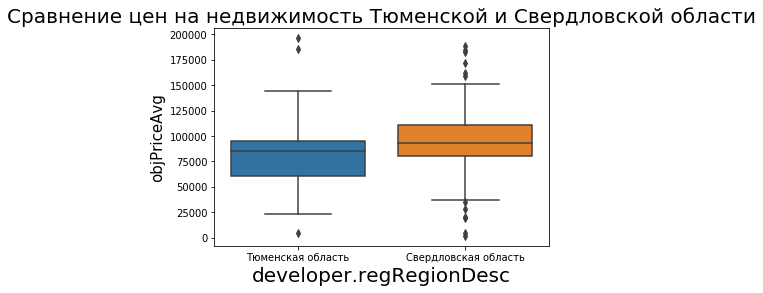

In [83]:
v.make_boxplot()

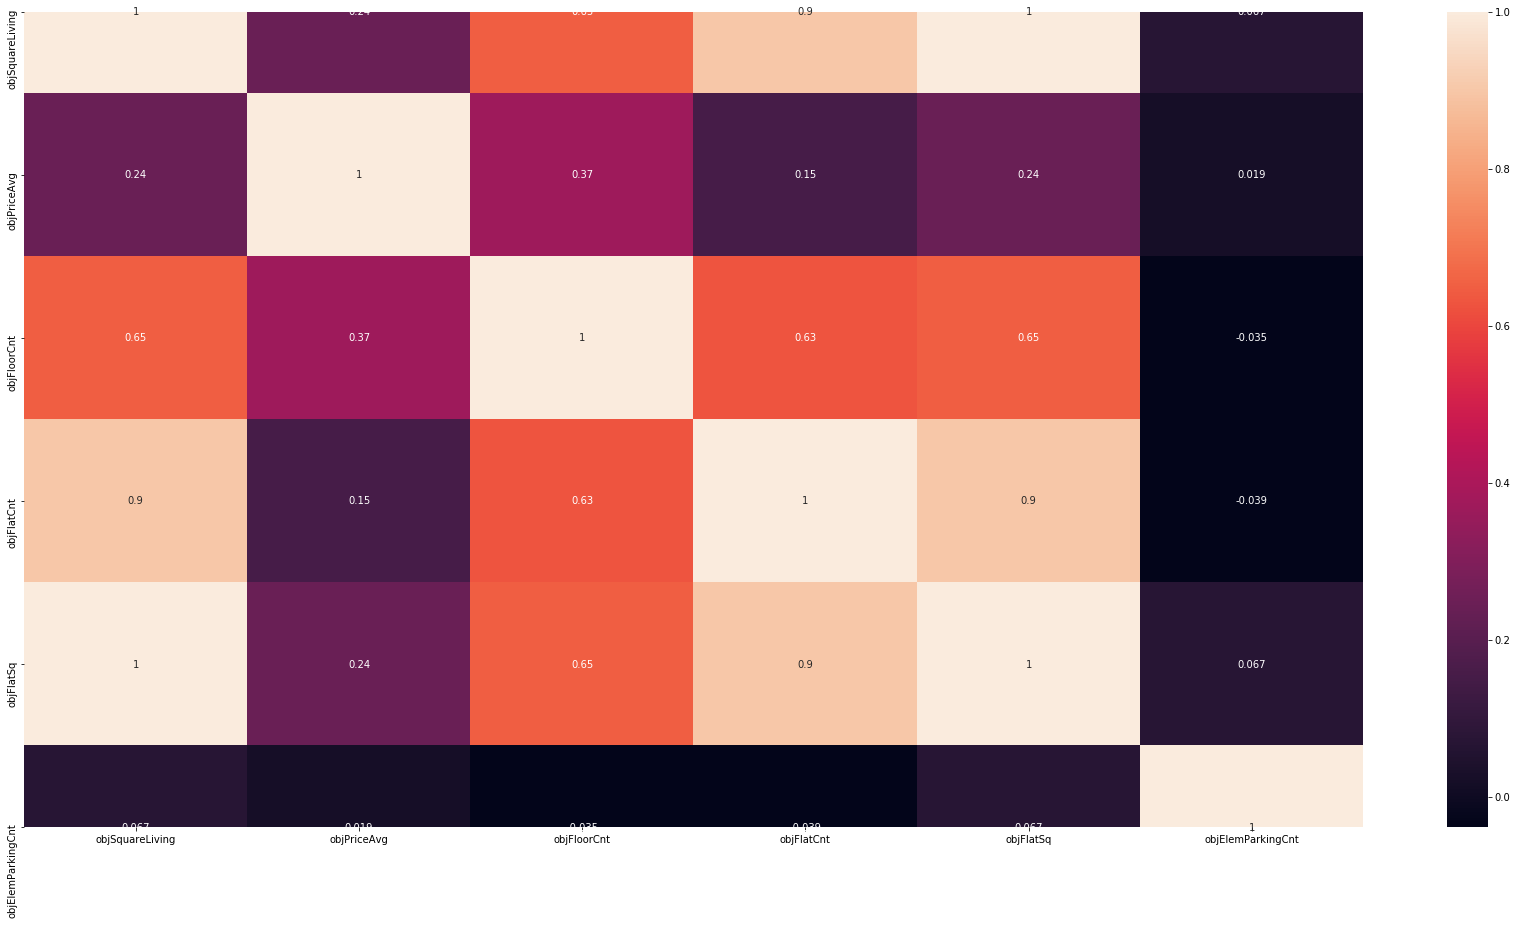

In [87]:
v1.make_heatmap()